# Reading input file

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

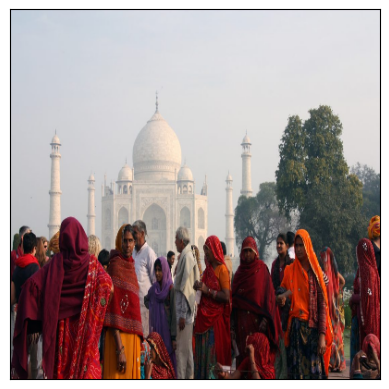

In [2]:
taj_color=cv.imread('taj.jpg',1)
resized_taj=cv.resize(taj_color,(400,400))
plt.xticks([]),plt.yticks([])

taj_rgb=cv.cvtColor(resized_taj,cv.COLOR_BGR2RGB)
plt.imshow(taj_rgb)
plt.show()

# Edge Enhancement

In [3]:
custom_filter=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],dtype=np.float32)

In [4]:
result=cv.filter2D(resized_taj,-1,custom_filter)

(([], []), ([], []))

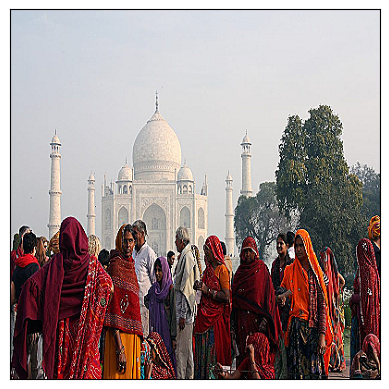

In [5]:
taj_rgb=cv.cvtColor(result,cv.COLOR_BGR2RGB)
plt.imshow(taj_rgb)
plt.xticks([]),plt.yticks([])

# Smoothing

(([], []), ([], []))

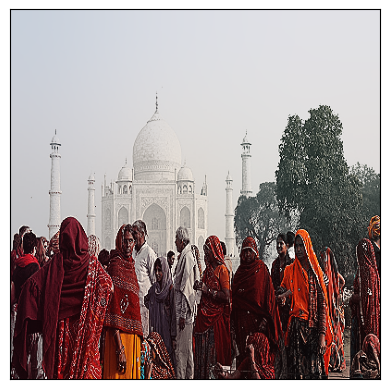

In [6]:
result_taj=cv.bilateralFilter(result,-1,50,50)
edges_rgb=cv.cvtColor(result_taj,cv.COLOR_BGR2RGB)
plt.imshow(edges_rgb)
plt.xticks([]),plt.yticks([])

# Thresholding

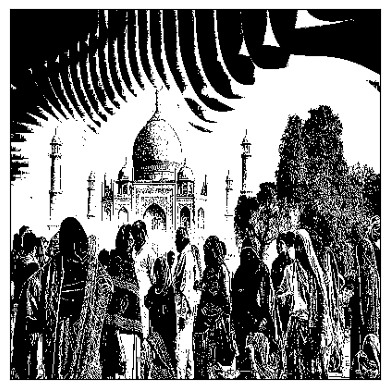

In [7]:
taj_gray=cv.cvtColor(result_taj,cv.COLOR_BGR2GRAY)
taj_adaptive_thresh=cv.adaptiveThreshold(taj_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,149,0)
plt.xticks([]),plt.yticks([])

taj=cv.cvtColor(taj_adaptive_thresh,cv.COLOR_GRAY2RGB)
plt.imshow(taj)
plt.show()

# Drawing Contours

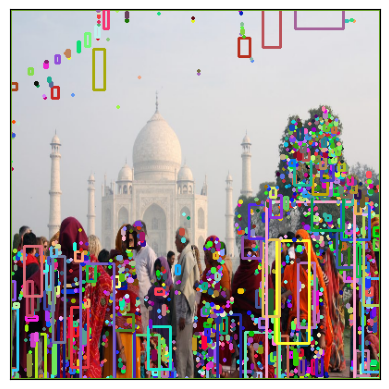

In [8]:
taj_contours,cont_hierarchy=cv.findContours(taj_adaptive_thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
taj_rect=cv.resize(taj_color,(400,400))
for i in range (len(taj_contours)):
    color=(np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
    x,y,w,h=cv.boundingRect(taj_contours[i])
    cv.rectangle(taj_rect,(x,y),(x+w,y+h),color,2)
plt.xticks([]),plt.yticks([])
taj=cv.cvtColor(taj_rect,cv.COLOR_BGR2RGB)
plt.imshow(taj)
plt.show()